<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/Times_Series_Forecasting_with_ARIMA_and_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series forecasting

# Passenger Volume forecasting on singapore changi airport


Technical steps:

1. Standardize time series
    - handle missing values
    - handle noise/outliers
    - Normalize the time series
    
2. Time Series EDA
    - Decomposition of components
    - Analyze trend, seasionality visually
    - Perform Dicky fuller test to analyze if there is trend
    - perform autocorrelation and partial autocorrelation analysis
    - identify suitable values of p,d,q
    
3. Apply ARIMA
    - apply ARIMA
    - forecast 
    - evaluate forecast
    - tune and optimize

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data
df = pd.read_csv(r"D:\AI\collabera\thoughtspot\changi_airport_data.csv")
df.shape

(974, 3)

In [ ]:
df.head()

,month,level_1,value
0,1980-01,Total Aircraft Arrivals And Departures,6501
1,1980-01,Total Passengers,566879
2,1980-02,Total Aircraft Arrivals And Departures,6112
3,1980-02,Total Passengers,552263
4,1980-03,Total Aircraft Arrivals And Departures,6391


In [ ]:
df = df[df['level_1']=='Total Passengers']
df.shape

(487, 3)

In [ ]:
df.month = pd.to_datetime(df['month'])
df = df[['month','value']]
df2 = df.copy()
df.head()

,month,value
1,1980-01-01,566879
3,1980-02-01,552263
5,1980-03-01,597644
7,1980-04-01,561218
9,1980-05-01,587003


In [ ]:
df.index = df.month
df = df[['value']]
df.head()

In [ ]:
# taking data from 2004 to 2018
df3 = df['2004-01-01':'2018-12-01']
df3.shape

(180, 1)

In [ ]:
df3.head()

In [ ]:
sns.set_theme()

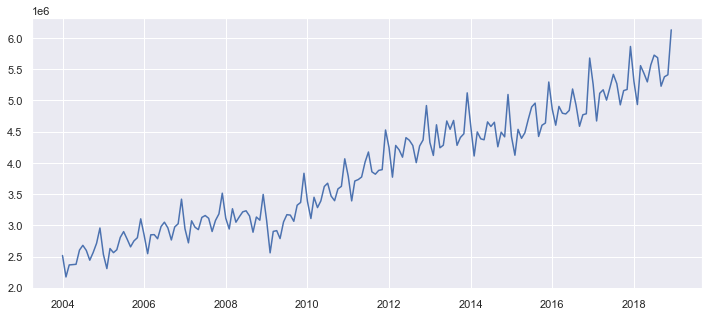

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df3)
plt.show()

### Dicky Fuller test to check for stationarity

- Null Hypothesis: Data is not stationary, it has trend

CI = 95%, alpha = 1 - CI = 1 - 0.95 = 0.05

    - if pvalue>alpha = null hypothesis is accepted
    - if pvalue< alpha = null hypothesis is rejected

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df3['value'])

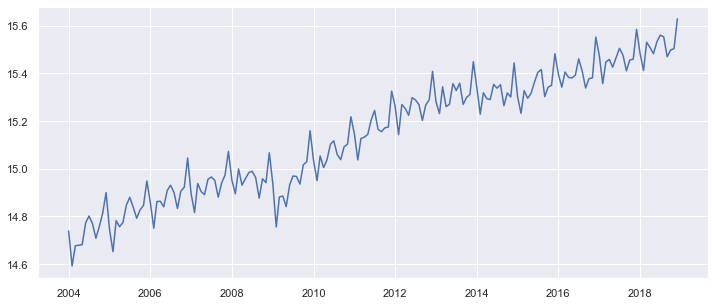

In [ ]:
df3log = np.log(df3)
plt.figure(figsize=(12,5))
plt.plot(df3log)
plt.show()

In [ ]:
df3logdiff = df3log - df3log.shift(1)
df3logdiff.head()

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df3logdiff)
plt.show()

In [ ]:
adfuller(df3logdiff['value'].dropna())

In [ ]:
import pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima(df3log,suppress_warnings=True,seasonal=False,trace=True,
                  start_p=1,start_q=1,d=1,max_p=3,max_q=3)
model.fit(df3log)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-485.213, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-417.068, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-428.011, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-483.558, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-418.275, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-498.949, Time=0.76 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-464.045, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-497.320, Time=1.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-496.375, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-496.085, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-472.341, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-497.143, Time=1.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-482.497, Time=0.32 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 7.029 seconds


ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
test = df['2019-01-01':'2019-12-01']
test.shape

(12, 1)

In [ ]:
forecast = model.predict(n_periods=12)
forecast = pd.DataFrame(np.exp(forecast,),index=test.index)
forecast

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(test,c='g')
plt.plot(forecast,c='r')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(test,forecast)

0.04076955790854319

# Seasonal ARIMA

In [ ]:
model = auto_arima(df3log,suppress_warnings=True,seasonal=True,
                   start_P=0,start_Q=0,max_P=3,max_Q=3,trace=True,m=12,
                  start_p=1,start_q=1,d=1,max_p=3,max_q=3)
model.fit(df3log)

In [ ]:
test = df['2019-01-01':'2019-12-01']
test.shape

(12, 1)

In [ ]:
forecast = model.predict(n_periods=12)
forecast = pd.DataFrame(np.exp(forecast,),index=test.index)
forecast

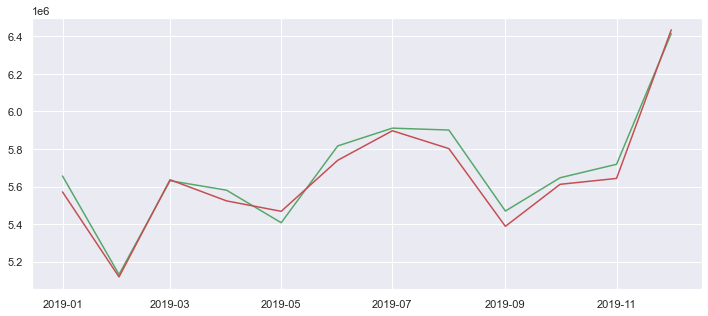

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(test,c='g')
plt.plot(forecast,c='r')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(test,forecast)

0.009119066986778357

In [ ]:
import pmdarima
pmdarima.__version__

'1.8.4'

In [ ]:
import statsmodels
statsmodels.__version__

'0.12.2'